In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [60]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.dpi'] = 100

In [2]:
dfs = []
for i in range(1, 7):
    bfs_file = f'tests/results/bfs_{i}.txt'
    astar_file = f'tests/results/aStar_{i}.txt'
    df_temp = pd.read_csv(bfs_file, delimiter=' ', header=None, names=['execution_time', 'steps'])
    df_temp['algo'] = 'bfs'
    df_temp['difficulty'] = i
    dfs.append(df_temp)
    
    df_temp = pd.read_csv(astar_file, delimiter=' ', header=None, names=['execution_time', 'steps'])
    df_temp['algo'] = 'a_star'
    df_temp['difficulty'] = i
    dfs.append(df_temp)
df_execution = pd.concat(dfs)
df_execution.reset_index(inplace=True, drop=True)
df_execution.describe()

,execution_time,steps,difficulty
count,1200.000000,1200.000000,1200.000000
mean,0.023560,149.500000,3.500000
std,0.035804,354.129576,1.708537
min,0.000000,8.000000,1.000000
25%,0.002001,16.750000,2.000000
50%,0.010000,29.000000,3.500000
75%,0.031257,43.000000,5.000000
max,0.335075,1309.000000,6.000000


In [3]:
df_execution

,execution_time,steps,algo,difficulty
0,0.000999,8,bfs,1
1,0.001000,8,bfs,1
2,0.001001,8,bfs,1
3,0.001001,8,bfs,1
4,0.001000,8,bfs,1
...,...,...,...,...
1195,0.053012,49,a_star,6
1196,0.053012,49,a_star,6
1197,0.051011,49,a_star,6
1198,0.051011,49,a_star,6


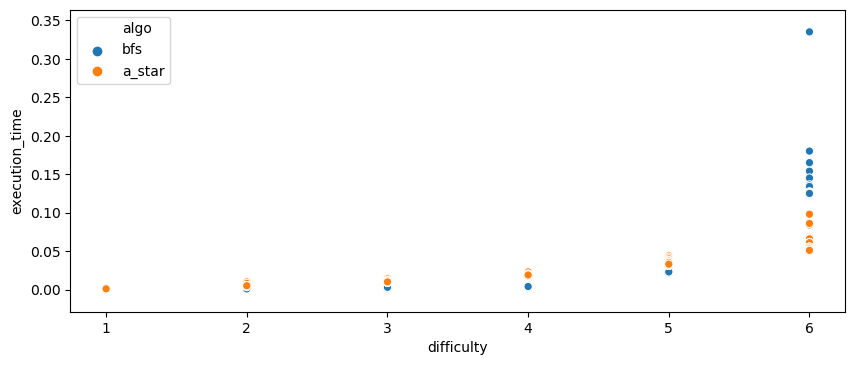

In [61]:
sns.scatterplot(df_execution.difficulty, df_execution.execution_time, hue=df_execution.algo)

In [23]:
df_execution[['algo', 'execution_time', 'difficulty']].groupby(['difficulty', 'algo']).agg(['min', 'mean', 'median', 'max'])

execution_time                              
                             min      mean    median       max
difficulty algo                                               
1          a_star       0.000998  0.001631  0.002000  0.002050
           bfs          0.000000  0.000850  0.001000  0.001007
2          a_star       0.004001  0.005141  0.005001  0.010003
           bfs          0.000999  0.001520  0.001001  0.004002
3          a_star       0.010000  0.010702  0.010003  0.015004
           bfs          0.001998  0.002611  0.003000  0.004001
4          a_star       0.018003  0.018684  0.018999  0.023005
           bfs          0.003000  0.003831  0.004001  0.005001
5          a_star       0.032006  0.033688  0.033007  0.044011
           bfs          0.020955  0.021944  0.021505  0.031008
6          a_star       0.050003  0.053982  0.052008  0.098021
           bfs          0.121027  0.128139  0.123028  0.335075

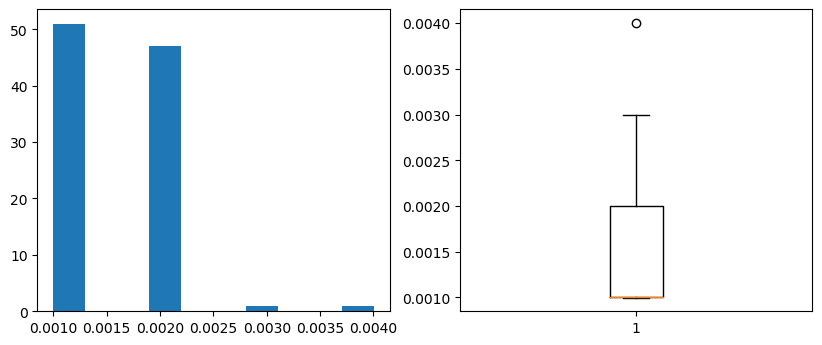

In [65]:
serie = df_execution[((df_execution.algo == 'bfs') & (df_execution.difficulty == 2))].execution_time.values
ax1 = plt.subplot(1,2,1)
ax1.hist(serie)

ax2 = plt.subplot(1,2,2)
ax2.boxplot(serie)

plt.show()

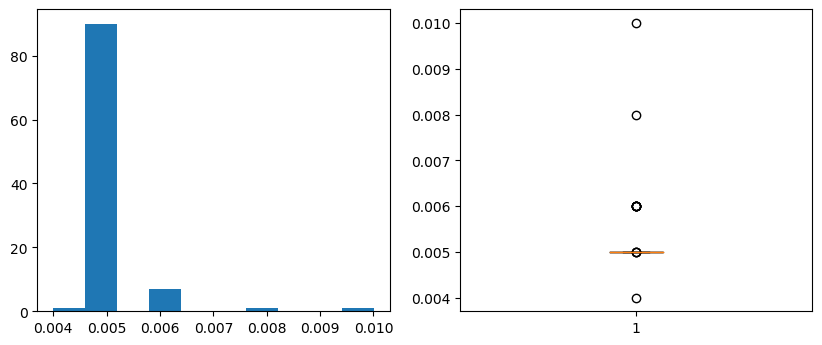

In [66]:
serie = df_execution[((df_execution.algo == 'a_star') & (df_execution.difficulty == 2))].execution_time.values
ax1 = plt.subplot(1,2,1)
ax1.hist(serie)

ax2 = plt.subplot(1,2,2)
ax2.boxplot(serie)

plt.show()